In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
df_indexed = pd.read_csv('economic_index.csv')
df_indexed.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [ ]:
# drop unnecessary columns
df_indexed.drop(columns=["Unnamed: 0", "year", "month"], axis=1, inplace=True)
df_indexed.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [ ]:
# check null values -> 1 means 1 null val and 0 means no null val
df_indexed.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

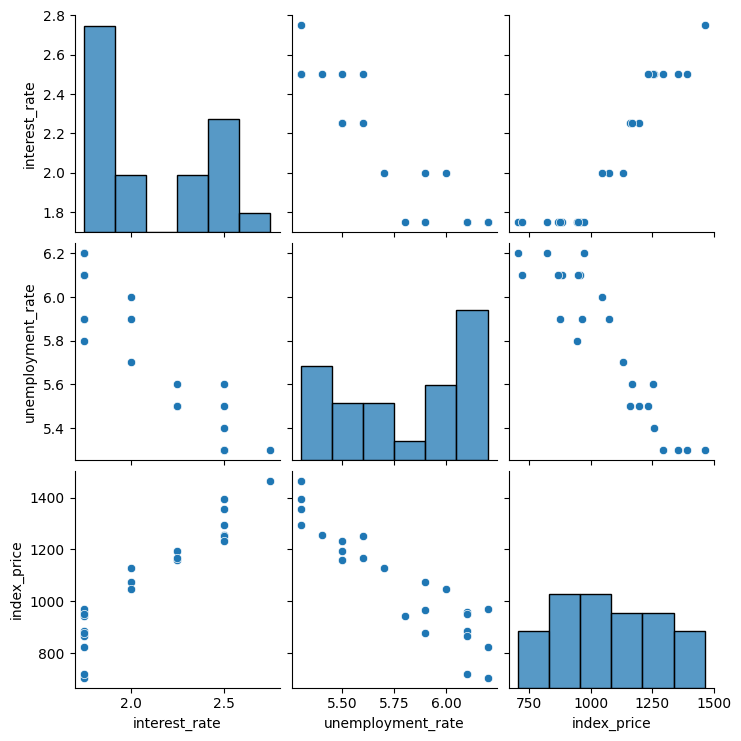

In [ ]:
# let's do visualization
import seaborn as sns
sns.pairplot(df_indexed)

In [ ]:
df_indexed.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment rate')

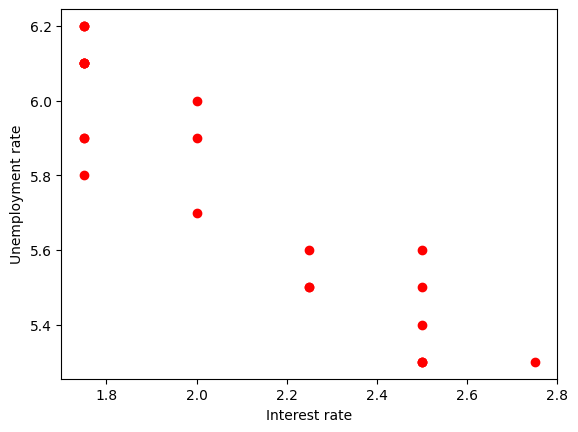

In [ ]:
# visalize the datapoints more closely
plt.scatter(df_indexed['interest_rate'], df_indexed['unemployment_rate'], color='r')
plt.xlabel("Interest rate")
plt.ylabel("Unemployment rate")


In [ ]:
# independent and dependent features
# x = df_indexed[['interest_rate',	'unemployment_rate']]
x = df_indexed.iloc[:, :-1]
y = df_indexed.iloc[:, -1]  # put last column in y value


In [ ]:
x.head()
y.head()

(   interest_rate  unemployment_rate
 0           2.75                5.3
 1           2.50                5.3
 2           2.50                5.3
 3           2.50                5.3
 4           2.50                5.4,
 0     1464
 1     1394
 2     1357
 3     1293
 4     1256
 5     1254
 6     1234
 7     1195
 8     1159
 9     1167
 10    1130
 11    1075
 12    1047
 13     965
 14     943
 15     958
 16     971
 17     949
 18     884
 19     866
 20     876
 21     822
 22     704
 23     719
 Name: index_price, dtype: int64)

In [ ]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

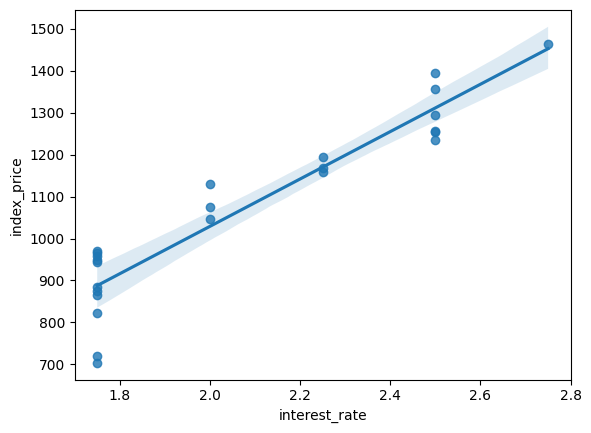

In [ ]:
import seaborn as sns
sns.regplot(x=df_indexed['interest_rate'], y=df_indexed['index_price'])

In [ ]:
# standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# fit: Computes the mean and standard deviation of the features in the training data X_train.
# transform: Uses the computed mean and standard deviation to standardize the training data, i.e., subtracts the mean and
# divides by the standard deviation for each feature.


In [ ]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [ ]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

In [ ]:
regression.fit(X_train, y_train)

# The fit method trains the model on the provided training data (X_train) and corresponding target values (y_train).
# The model learns the relationship between the features in X_train and the target values in y_train, which it can then
# use to make predictions on new, unseen data.


LinearRegression()

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=3)

In [ ]:
np.mean(validation_score)

-5914.828180162386

In [ ]:
# prediction
y_pred = regression.predict(X_test)

In [ ]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

Assumptions

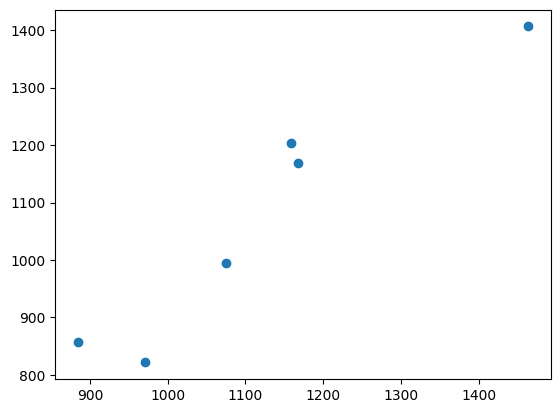

In [ ]:
plt.scatter(y_test, y_pred)

In [ ]:
residuals = y_test - y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


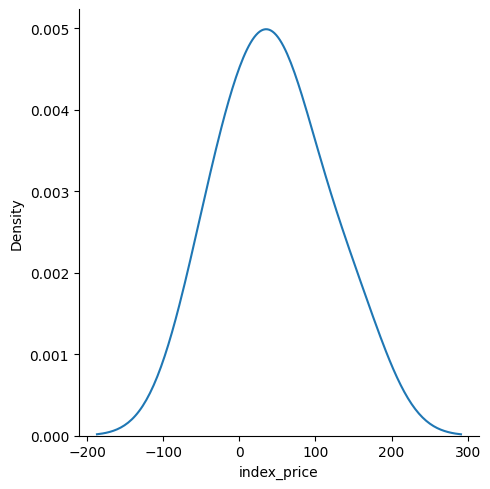

In [ ]:
# plot this residuals
sns.displot(residuals, kind='kde')

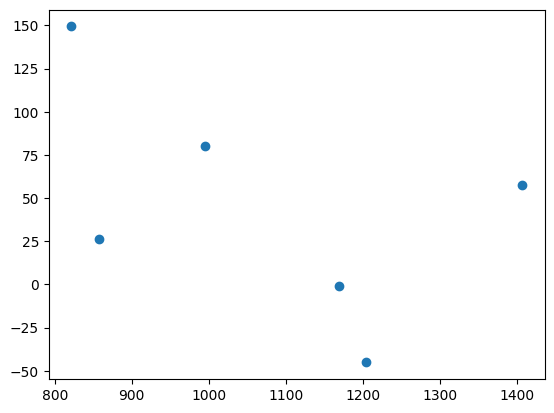

In [ ]:
# scatter plot w.r.t prediction and residuals
plt.scatter(y_pred, residuals)

In [ ]:
print(regression.coef_)

[  88.27275507 -116.25716066]
